In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS, TfidfVectorizer
from nltk import word_tokenize
from langdetect import detect_langs
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [2]:
df = pd.DataFrame.from_csv('train.tsv', sep='\t')


C:\Users\Mehrtoos\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


In [60]:
df.tail()

,SentenceId,Phrase,Sentiment
PhraseId,,,
156056,8544,Hearst 's,2
156057,8544,forced avuncular chortles,1
156058,8544,avuncular chortles,3
156059,8544,avuncular,2
156060,8544,chortles,2


In [4]:
df.shape

(156060, 3)

In [6]:
df['Phrase'][1]

'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .'

In [5]:
df.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

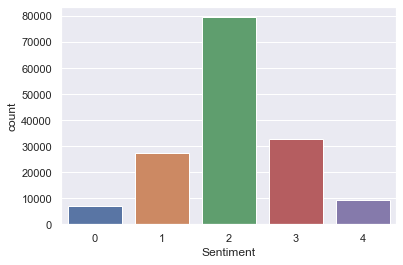

In [6]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="Sentiment", data=df)
ax

In [7]:
df.Sentiment.value_counts() / len(df)

2    0.509945
3    0.210989
1    0.174760
4    0.058990
0    0.045316
Name: Sentiment, dtype: float64

In [8]:
length_reviews = df.Phrase.str.len()
type(length_reviews)

pandas.core.series.Series

In [9]:
print(max(length_reviews))
print(min(length_reviews))

283
1


In [14]:
df.Phrase[119]

'A positively thrilling combination of ethnography and all the intrigue , betrayal , deceit and murder'

In [15]:
blob_phrase = TextBlob(df.Phrase[119])
print(blob_phrase.sentiment)

Sentiment(polarity=0.25, subjectivity=1.0)


In [79]:
words = []
for element in df.Phrase:
    word = element.split(' ')
    words.append(word)

In [86]:
mystring1 = []
for element in words:
    mystring = ','.join(element)
    mystring1.append(mystring)
mystring1  

['A,series,of,escapades,demonstrating,the,adage,that,what,is,good,for,the,goose,is,also,good,for,the,gander,,,some,of,which,occasionally,amuses,but,none,of,which,amounts,to,much,of,a,story,.',
 'A,series,of,escapades,demonstrating,the,adage,that,what,is,good,for,the,goose',
 'A,series',
 'A',
 'series',
 'of,escapades,demonstrating,the,adage,that,what,is,good,for,the,goose',
 'of',
 'escapades,demonstrating,the,adage,that,what,is,good,for,the,goose',
 'escapades',
 'demonstrating,the,adage,that,what,is,good,for,the,goose',
 'demonstrating,the,adage',
 'demonstrating',
 'the,adage',
 'the',
 'adage',
 'that,what,is,good,for,the,goose',
 'that',
 'what,is,good,for,the,goose',
 'what',
 'is,good,for,the,goose',
 'is',
 'good,for,the,goose',
 'good',
 'for,the,goose',
 'for',
 'the,goose',
 'goose',
 'is,also,good,for,the,gander,,,some,of,which,occasionally,amuses,but,none,of,which,amounts,to,much,of,a,story,.',
 'is,also,good,for,the,gander,,,some,of,which,occasionally,amuses,but,none,of,

In [91]:
mystring1

['A,series,of,escapades,demonstrating,the,adage,that,what,is,good,for,the,goose,is,also,good,for,the,gander,,,some,of,which,occasionally,amuses,but,none,of,which,amounts,to,much,of,a,story,.',
 'A,series,of,escapades,demonstrating,the,adage,that,what,is,good,for,the,goose',
 'A,series',
 'A',
 'series',
 'of,escapades,demonstrating,the,adage,that,what,is,good,for,the,goose',
 'of',
 'escapades,demonstrating,the,adage,that,what,is,good,for,the,goose',
 'escapades',
 'demonstrating,the,adage,that,what,is,good,for,the,goose',
 'demonstrating,the,adage',
 'demonstrating',
 'the,adage',
 'the',
 'adage',
 'that,what,is,good,for,the,goose',
 'that',
 'what,is,good,for,the,goose',
 'what',
 'is,good,for,the,goose',
 'is',
 'good,for,the,goose',
 'good',
 'for,the,goose',
 'for',
 'the,goose',
 'goose',
 'is,also,good,for,the,gander,,,some,of,which,occasionally,amuses,but,none,of,which,amounts,to,much,of,a,story,.',
 'is,also,good,for,the,gander,,,some,of,which,occasionally,amuses,but,none,of,

In [112]:
text = []
for i in range(1,10):
    str(text.append(df.Phrase[i]))
text

['A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .',
 'A series of escapades demonstrating the adage that what is good for the goose',
 'A series',
 'A',
 'series',
 'of escapades demonstrating the adage that what is good for the goose',
 'of',
 'escapades demonstrating the adage that what is good for the goose',
 'escapades']

In [130]:
new_stop_words = ENGLISH_STOP_WORDS.union(['film','movie','series','cinema','theatre', 'writer',
                                           'director', 'story', 'romantic','comedy', 'LRB','RRB'])
text = []
for i in range(1,len(df)):
    text.append(df.Phrase[i])
my_string = ','.join(text)
cloud = WordCloud(background_color="white",stopwords=new_stop_words).generate(my_string)
cloud

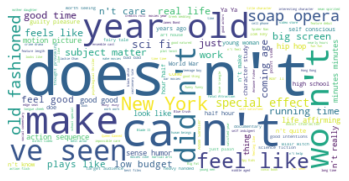

In [131]:
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [198]:
new_stop_words = ENGLISH_STOP_WORDS.union(['film','movie','series','cinema','theatre', 'writer',
                                           'director', 'story', 'romantic','comedy', 'LRB','RRB'])
vect = CountVectorizer(token_pattern = r'\b[^\d\W][^\d\W]+\b', max_features = 900, ngram_range=(1, 2), max_df = 200, stop_words=new_stop_words) #ngram_range=(min_n, max_n), Risk of overfitting for large max_n more features
vect.fit(df.Phrase)
X = vect.transform(df.Phrase)

In [199]:
X # sparse matric

<156060x900 sparse matrix of type '<class 'numpy.int64'>'
	with 113390 stored elements in Compressed Sparse Row format>

In [200]:
x_array = X.toarray() # dense array

In [201]:
x_df = pd.DataFrame(x_array, columns=vect.get_feature_names())

In [202]:
x_df.head()

,ability,able,acted,action sequences,actress,adaptation,add,admirable,adult,adults,...,words,worked,worse,worthwhile,worthy,wry,ya,yarn,years ago,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [137]:
word_tokens = [word_tokenize(phrase) for phrase in df.Phrase]

In [140]:
type(word_tokens[0])

list

In [23]:
type(word_tokens[0])

list

In [141]:
len_tokens = []
for i in range(len(word_tokens)):
    len_tokens.append(len(word_tokens[i]))

In [142]:
df['n_tokens'] = len_tokens

In [143]:
df.head()

,SentenceId,Phrase,Sentiment,n_tokens
PhraseId,,,,
1,1,A series of escapades demonstrating the adage ...,1,37
2,1,A series of escapades demonstrating the adage ...,2,14
3,1,A series,2,2
4,1,A,2,1
5,1,series,2,1


In [183]:
cleaned_tokens = [[word for word in item if word.isalpha()] for item in word_tokens]

In [184]:
len(word_tokens)

156060

In [185]:
len(cleaned_tokens)

156060

In [209]:
porter = PorterStemmer()
WNlemmatizer = WordNetLemmatizer()

In [210]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mehrtoos\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [211]:
stemmed_tokens = [WNlemmatizer.lemmatize(token) for token in word_tokens[1]]

In [205]:
vect3 = TfidfVectorizer(token_pattern = r'\b[^\d\W][^\d\W]+\b',max_features=1000, ngram_range=(1, 2), max_df = 200, stop_words=new_stop_words).fit(df.Phrase)
X3 = vect3.transform(df.Phrase)

In [206]:
x3_array = X3.toarray()

In [207]:
X3_df = pd.DataFrame(x3_array, columns = vect3.get_feature_names())
X3_df['n_tokens'] = len_tokens

In [213]:
X3_df.head()

,ability,able,absolutely,absorbing,acted,action sequences,actress,acts,adam,adaptation,...,worse,worthwhile,worthy,wry,ya,yarn,years ago,young woman,zone,n_tokens
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
